In [66]:
from __future__ import division

import numpy as np
import scipy
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [67]:
#set up function
def rhs(y, t, param):
    n0, beta = param
    f1 = y[1]
    f2 = (beta-n0)*y[0]
    return [f1, f2]

In [68]:
def sol_frame(start, stop, delta):
    pts = int(1 + ((stop - start) / delta))
    frame = np.linspace(start, stop, pts)
    return frame

In [75]:
#define constants
tol = 10**-4
n0 = 100
xp = [-1,1]
A = 1
y0 = [0,A]

beta_start = 100
beta = beta_start

# Pack up the parameters and initial conditions:
p = [n0, beta]

In [76]:
x_frame = sol_frame(xp[0], xp[1], 0.01)

In [77]:
dbeta = n0/100

for j in range(1, 1000):
    #reset beta
    p = [n0, beta]
    #solve ODE
    sol = integrate.odeint(rhs, y0, x_frame, args=(p,))
    
    #pull end value
    end = len(sol)
    end_val = sol[end-1:end, 0:1]
    
    #check if solution is within tolerance
    if abs(end_val) < tol:
        beta
        print('found solution on iteration:')
        print j
        break;
        
    if end_val > 0:
        beta = beta-dbeta
    else:
        beta = beta+dbeta/2
        dbeta = dbeta/2

y1a = sol[:,0:1]
y2a = sol[:,1:2]

1.0
100
found solution on iteration:
22


In [72]:
if end_val > 0:
    print end_val

[[4.70088793e-05]]


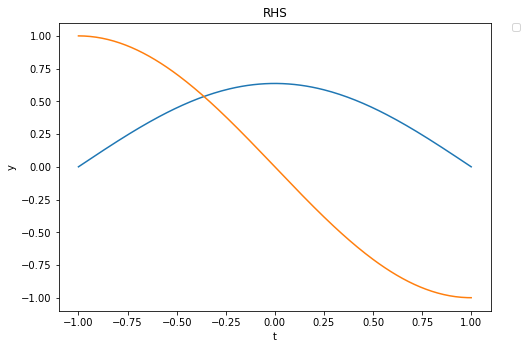

In [73]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame,y1a, label = '')
ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('RHS')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()